 
    Reading Energy and Electricity Data 
    
    
Summary of indicators for countries neighbourhood to india :
        country_name  access_to_electricity  co2_emission           gdp  electricity_usage  energy_usage
country                                                                                                 
AFG      Afghanistan              81.568954       8653.75  1.913290e+10                NaN           NaN
BGD       Bangladesh              74.585972      67961.25  2.150742e+11         292.821042    220.835723
CHN            China              99.979901    9827381.25  1.136325e+13        3606.076773   2165.820947
IND            India              86.091506    2105313.75  2.282826e+12         747.199270    604.878979
PAK         Pakistan              71.617190     166798.75  2.623563e+11         441.439998    463.545385
LKA        Sri Lanka              94.057704      18945.00  7.904653e+10         520.816625    516.647161
Summary of indicators for regions/continents  

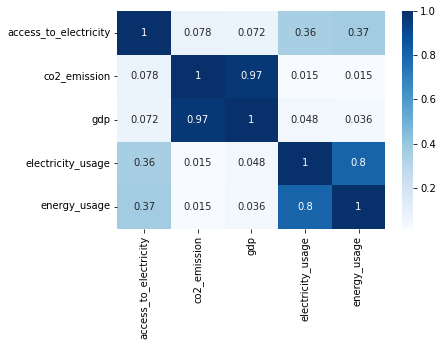

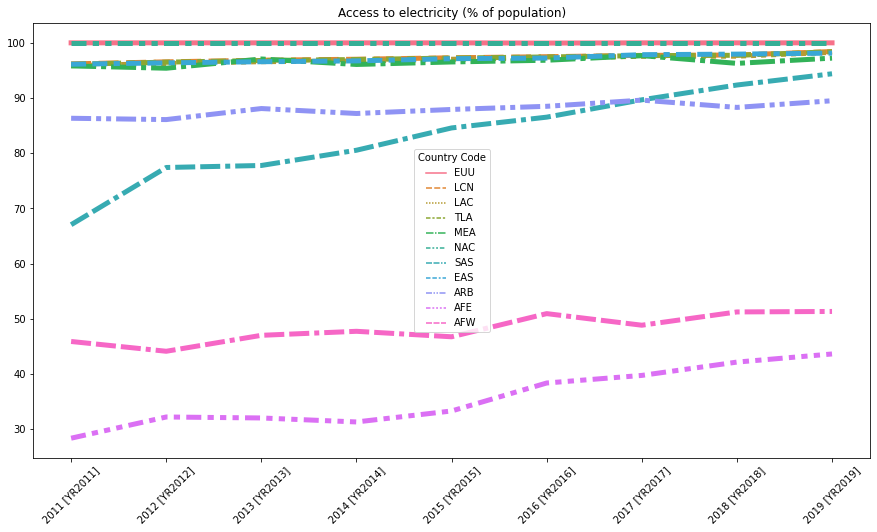

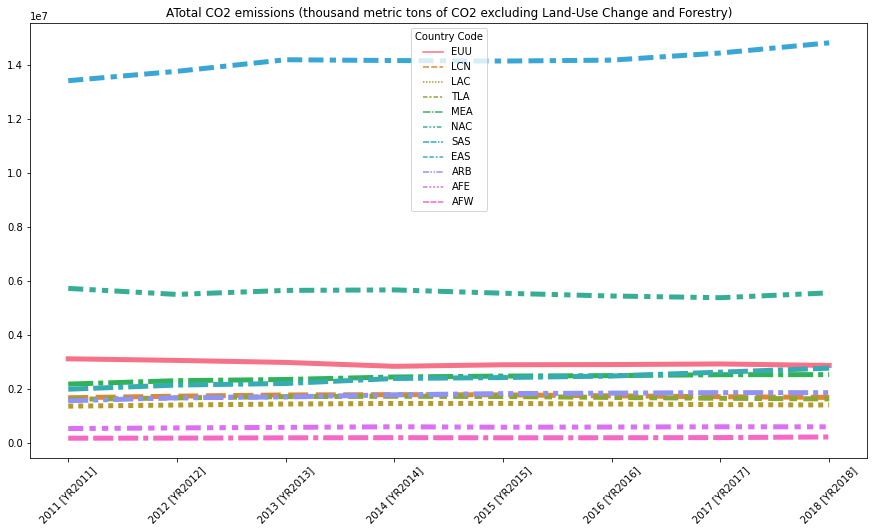

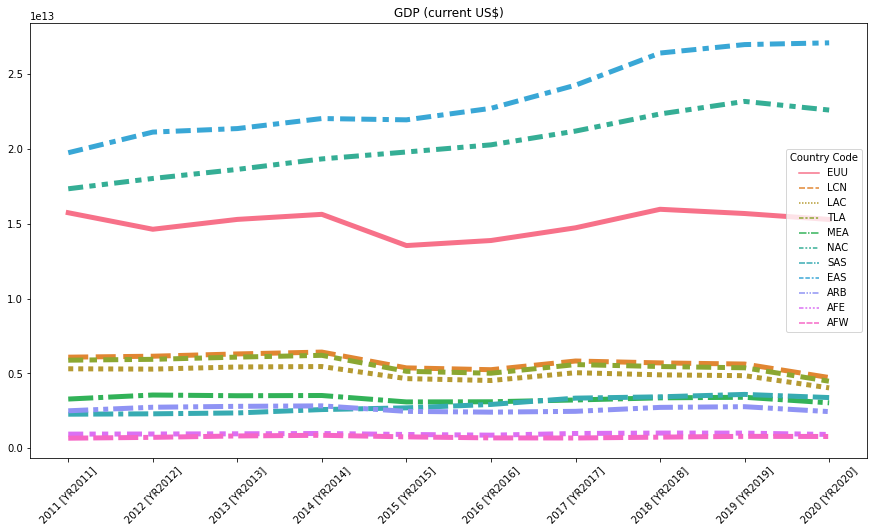

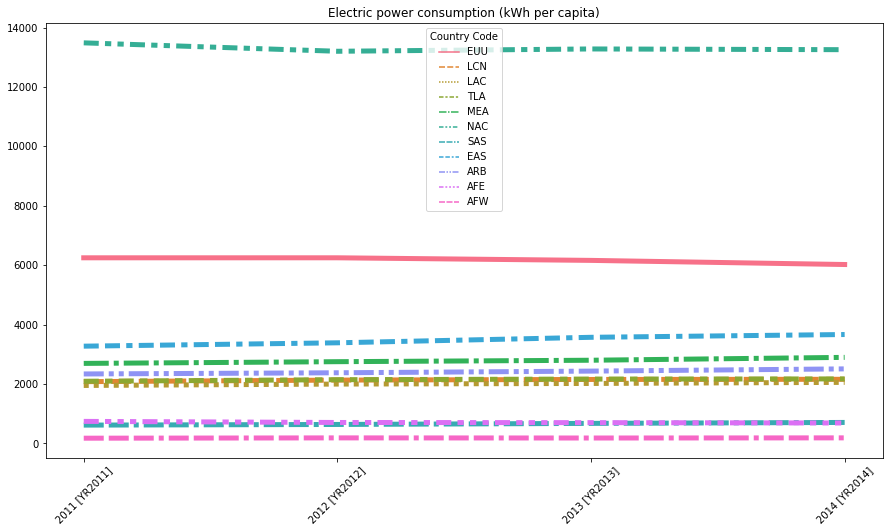

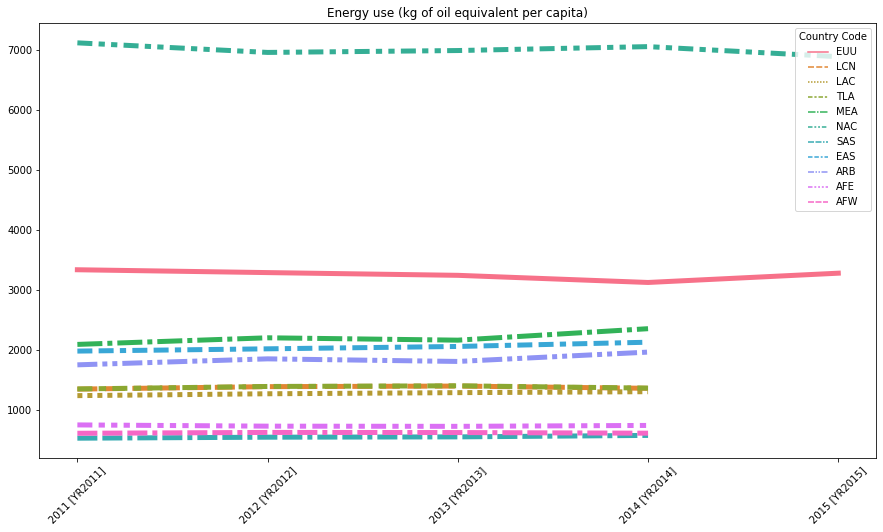

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
import math
import seaborn as sb

sb.color_palette("Paired")

def read_data(file_path,file_name):
    """ 
    Reading Energy and Electricity Data 
    
    """
    path=os.path.join(file_path,file_name)
    data1=pd.read_csv(path)
    data2=data1.transpose()
    
    return data1,data2;       


def clean_data(data):
    data=data.dropna();
    data.replace('..',math.nan, inplace=True)
    cols = data.columns

    return data;

def summary_stats(data_last_10_years):
    
    years=['2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
    '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
    '2019 [YR2019]', '2020 [YR2020]']
    data_last_10_years.dtypes
    for col in years:
        data_last_10_years[col] = data_last_10_years[col].astype(float)
        
    data_last_10_years=data_last_10_years.T.fillna(data_last_10_years.mean(axis=1)).T
    
    data_last_10_years["mean"]=data_last_10_years[years].mean(axis=1)
    
    ''''Access to electricity'''
    access_to_elc=data_last_10_years.loc[data_last_10_years["Series Code"]=="EG.ELC.ACCS.ZS"]
    access_to_elc.reset_index(drop=True, inplace=True)

    access_to_elc.set_index("Country Code",inplace=True)

    
    '''C02 Emissions'''
    co2_emissions=data_last_10_years.loc[data_last_10_years["Series Code"]=="EN.ATM.CO2E.KT"]
    
    co2_emissions.set_index("Country Code",inplace=True)

    ''' GDP (current US$)'''
    
    gdp_current=data_last_10_years.loc[data_last_10_years["Series Code"]=="NY.GDP.MKTP.CD"]
    gdp_current.set_index("Country Code",inplace=True)

    ''' Electric power consumption (kWh per capita)'''
    
    elec_usage=data_last_10_years.loc[data_last_10_years["Series Code"]=="EG.USE.ELEC.KH.PC"]
    elec_usage.set_index("Country Code",inplace=True)

    """Energy use (kg of oil equivalent per capita) """
    energy_usage=data_last_10_years.loc[data_last_10_years["Series Code"]=="EG.USE.PCAP.KG.OE"]
    energy_usage.set_index("Country Code",inplace=True)

    climate_ind=pd.DataFrame()
    climate_ind['country']=access_to_elc.index
    climate_ind.set_index("country",inplace=True)
    climate_ind['country_name']=access_to_elc["Country Name"]
    climate_ind["access_to_electricity"]=access_to_elc["mean"]
    climate_ind["co2_emission"]=co2_emissions["mean"]
    climate_ind["gdp"]=gdp_current["mean"]
    climate_ind["electricity_usage"]=elec_usage["mean"]
    climate_ind["energy_usage"]=energy_usage["mean"]

    
    countries=["IND","AFG","PAK","CHN","LKA","BGD"]
    
    data_ind=climate_ind[climate_ind.index.isin(countries)]
    
    print("Summary of indicators for countries neighbourhood to india :")
    print(data_ind.to_string())
    
    regions=["EUU","LCN","LAC","TLA","MEA","NAC","SAS","WLD","EAS","ARB","AFE","AFW"]
    data_ind=climate_ind[climate_ind.index.isin(regions)]
    
    print("Summary of indicators for regions/continents  :")
    print(data_ind.to_string())
    return climate_ind


def check_corelation(climate_ind):
    corr = climate_ind.corr()
    print(corr.to_string())
    sb.heatmap(corr, cmap="Blues", annot=True)

def visualize(data_last_10_years):
    
    regions=["EUU","LCN","LAC","TLA"
    ,"MEA",
    "NAC",
    "SAS",
    "EAS",
    "ARB",
    "AFE",
    "AFW"]
    series_codes=["NY.GDP.MKTP.CD","EG.ELC.ACCS.ZS","EG.USE.ELEC.KH.PC","EG.USE.PCAP.KG.OE","EN.ATM.CO2E.KT"]
    data_regions=data_last_10_years[data_last_10_years['Country Code'].isin(regions)]       
    
    ''''Access to electricity'''
    access_to_elc=data_regions.loc[data_regions["Series Code"]=="EG.ELC.ACCS.ZS"]
    access_to_elc.set_index('Country Code',inplace=True)

    access_to_elc=access_to_elc.iloc[:,3:].T
    plt.figure(figsize = (15,8))
        

    chart=sb.lineplot(data=access_to_elc,linewidth=5)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title("Access to electricity (% of population)")

    None

    '''C02 Emissions'''
    co2_emissions=data_regions.loc[data_regions["Series Code"]=="EN.ATM.CO2E.KT"]
    
    co2_emissions.set_index("Country Code",inplace=True)
    
    co2_emissions=co2_emissions.iloc[:,3:].T
    plt.figure(figsize = (15,8))
        

    chart=sb.lineplot(data=co2_emissions,linewidth=5)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title("ATotal CO2 emissions (thousand metric tons of CO2 excluding Land-Use Change and Forestry)")

    None

    ''' GDP (current US$)'''
    
    gdp_current=data_regions.loc[data_regions["Series Code"]=="NY.GDP.MKTP.CD"]
    gdp_current.set_index("Country Code",inplace=True)
    gdp_current=gdp_current.iloc[:,3:].T

    plt.figure(figsize = (15,8))
        

    chart=sb.lineplot(data=gdp_current,linewidth=5)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title("GDP (current US$)")

    None
    ''' Electric power consumption (kWh per capita)'''
    
    elec_usage=data_regions.loc[data_regions["Series Code"]=="EG.USE.ELEC.KH.PC"]
    elec_usage.set_index("Country Code",inplace=True)
    elec_usage=elec_usage.iloc[:,3:].T

    plt.figure(figsize = (15,8))
        

    chart=sb.lineplot(data=elec_usage,linewidth=5)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title("Electric power consumption (kWh per capita)")

    None
    
    """Energy use (kg of oil equivalent per capita) """
    energy_usage=data_regions.loc[data_regions["Series Code"]=="EG.USE.PCAP.KG.OE"]
    energy_usage.set_index("Country Code",inplace=True)
    energy_usage=energy_usage.iloc[:,3:].T

    plt.figure(figsize = (15,8))
        

    chart=sb.lineplot(data=energy_usage,linewidth=5)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title("Energy use (kg of oil equivalent per capita)")

    None
    

def main():
    #Reading Data
    file_path="C:/Users/Krishna Sai/Downloads/Assignmenet-2/data"
    file_name="climate-change-electricity.csv"
    print(read_data.__doc__)
    data1,data2=read_data(file_path,file_name);
    data_last_10_years=data1[["Series Code","Country Code","Country Name","2020 [YR2020]","2019 [YR2019]","2018 [YR2018]","2017 [YR2017]","2016 [YR2016]"]]
    data_last_10_years=clean_data(data1)
    
    climate_ind=summary_stats(data_last_10_years)
    check_corelation(climate_ind)
    visualize(data_last_10_years)
    




if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    main()


    
